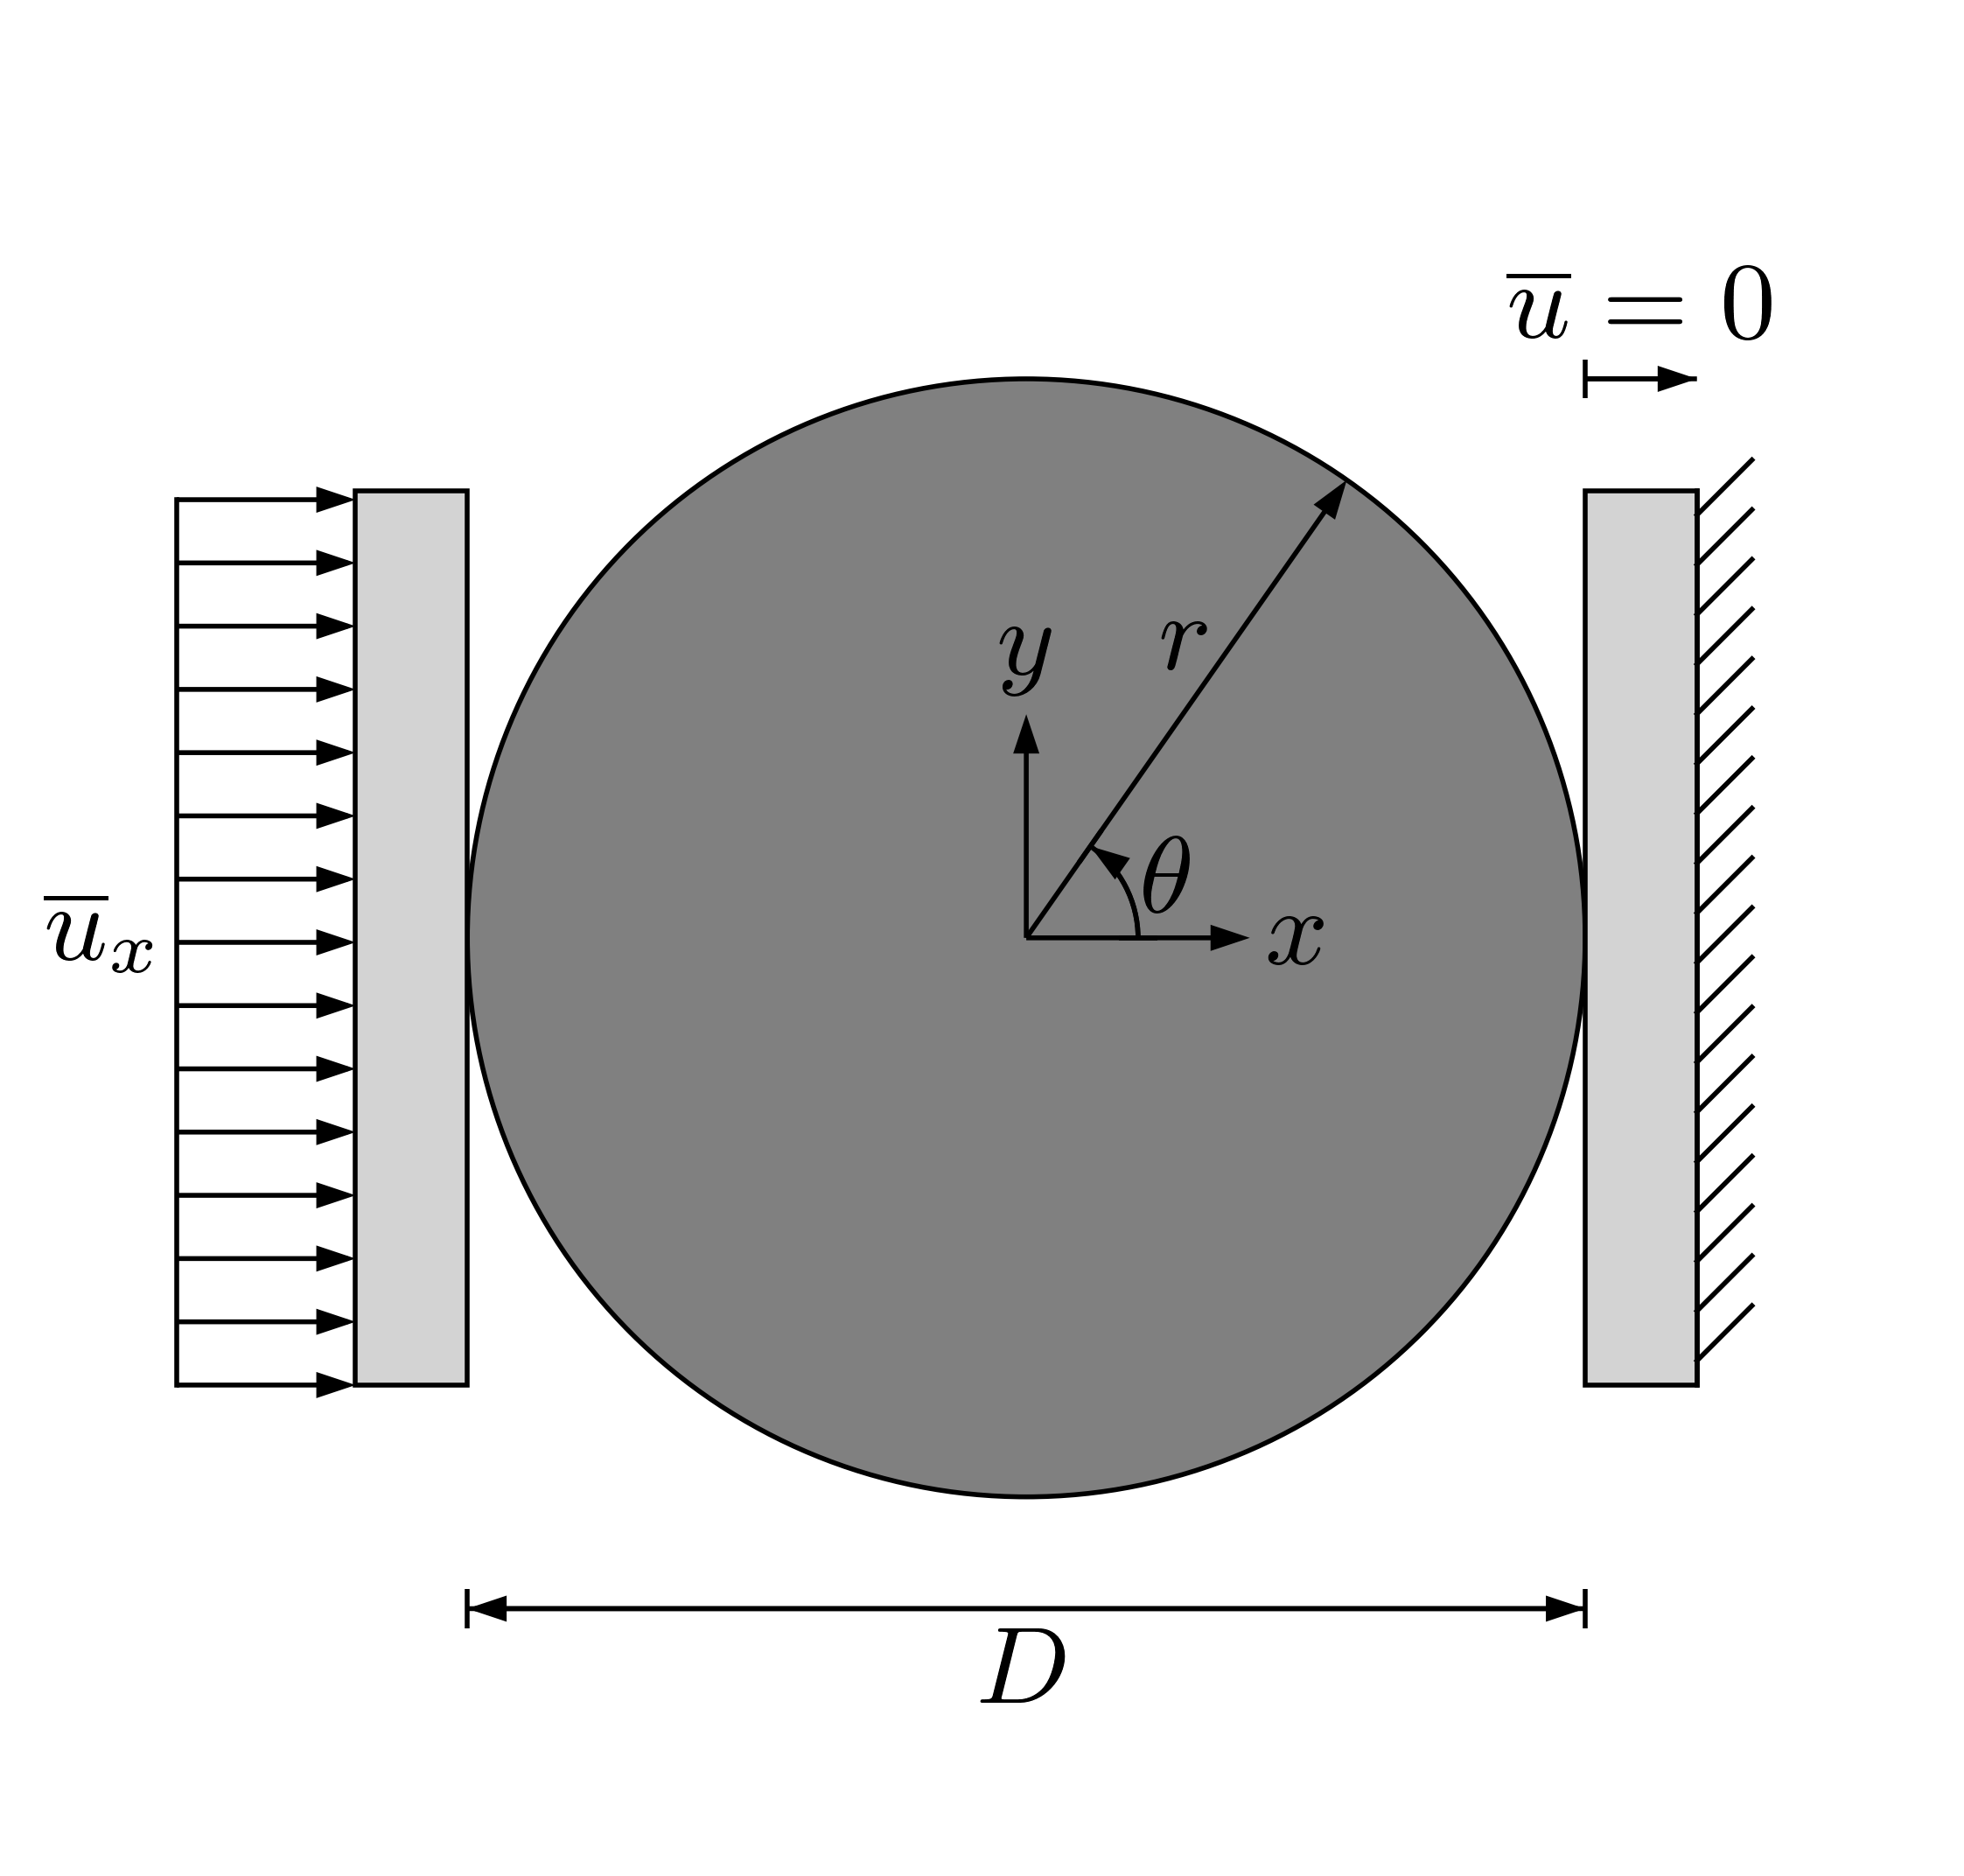

In [1]:
from cm_vis.scheme.basic import Scheme
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle

plt.style.use('fem')
fig, ax = plt.subplots()

# add disk
disk = Circle([0, 0], 25, fc='gray', ec='k', lw=0.4)
left_platen = Rectangle([-30, -20], 5, 40, fc='lightgray', ec='k', lw=0.4)
right_platen = Rectangle([25, -20], 5, 40, fc='lightgray', ec='k', lw=0.4)
ax.add_patch(disk)
ax.add_patch(left_platen)
ax.add_patch(right_platen)

ax.set(xlim=[-40, 40], ylim=[-40, 40], aspect='equal')

# draw scheme
scheme = Scheme(ax, lw=0.4)
scheme.dim_dist([-25, -30], [25, -30], text='$D$', textloc='lower')
scheme.dim_radius([0, 0], 25, angle=55, text='$r$', textloc='upper')
scheme.dim_angle(5, 0, 55, center=[0, 0], 
                 text="$\\theta$", arrowloc="stop", textloc="right")

# draw coord axis
scheme.add_coord_axis(length=np.array([10, 10]))

# def bc
left_bnd = np.vstack((-30*np.ones(100), np.linspace(-20, 20, 100))).T
right_bnd = np.vstack((30*np.ones(100), np.linspace(-20, 20, 100))).T
bcs = np.vstack((8*np.ones(100), np.zeros(100))).T

scheme.add_point_bc(np.array([25, 25]), np.array([5, 0]), 
                    text="$\overline{u}=0$", textloc="upper")
scheme.add_dist_bc(left_bnd, bcs, type="head", scale=1, interval=7,
                   text="$\overline{u}_x$", textloc="left")
scheme.add_fix_bc(right_bnd, spacing=4, angle=-45)
